In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [58]:
pd.set_option("max_rows", 25)

In [59]:
# Apply the default theme
sns.set_theme()
sns.set_style("whitegrid")

In [60]:
data_path = '/home/achara/data/achara/'

In [61]:
df = pd.read_csv(data_path + 'final_vp_data_2017_to_2019.csv')

In [62]:
df.head()

,DateTime,SensorDepth_Water_EXO,PC_Water_EXO,Chla_Water_EXO,DO_Water_EXO,DO-Sat_Water_EXO,SpCond_Water_EXO,Temperature_Water_EXO,pH_Water_EXO,rel_fl,month,day,year,SolarRad_Air_LiCor
0,10/1/2017,1.01,0.1556,0.358058,9.17,101.610000,139.810000,20.380000,8.010344,0.880,10,1,2017,127.38941
1,10/1/2017,1.03,0.1520,0.544445,9.18,101.776667,139.786667,20.386667,8.027139,0.862,10,1,2017,127.38941
2,10/1/2017,1.05,0.1304,0.843708,9.16,101.230000,139.660000,20.220000,8.019958,0.844,10,1,2017,127.38941
3,10/1/2017,1.07,0.1592,0.939807,9.16,101.590000,139.780000,20.410000,8.038803,0.826,10,1,2017,127.38941
4,10/1/2017,1.09,0.1340,0.797623,9.15,101.490000,139.750000,20.420000,8.024188,0.835,10,1,2017,127.38941


## Exploring our target variable `PC_Water_EXO`

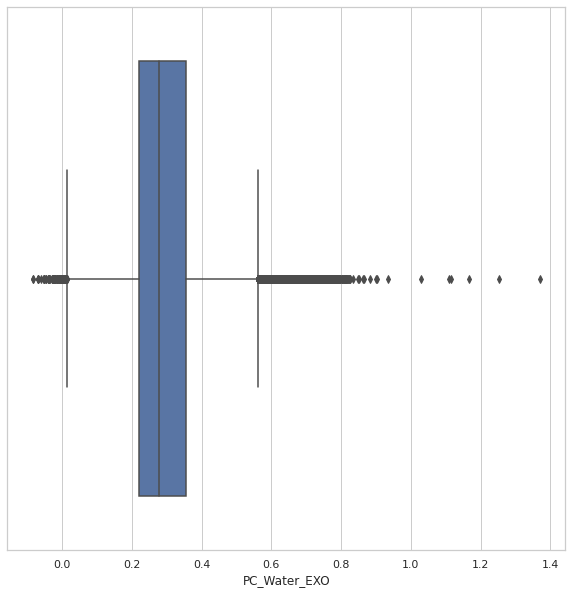

In [63]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='PC_Water_EXO', orient='h')
plt.show()

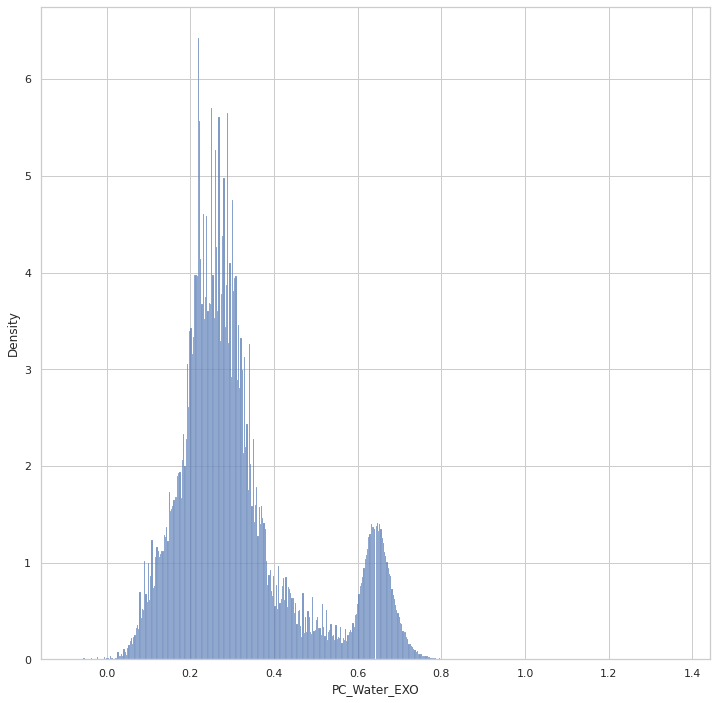

In [64]:
plt.figure(figsize=(12, 12))
sns.histplot(data=df, x='PC_Water_EXO', stat='density', bins=500)
plt.show()

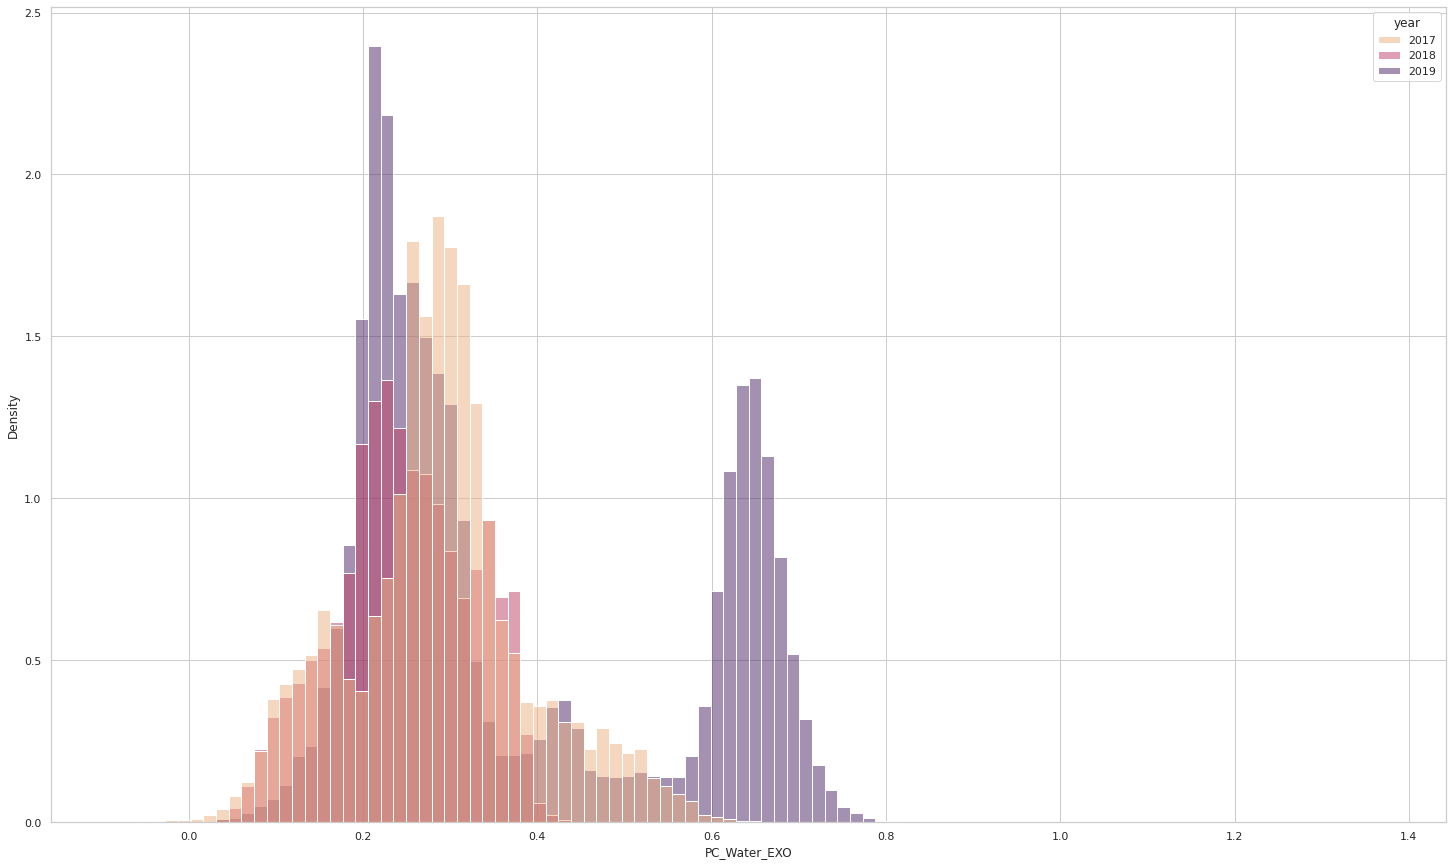

In [65]:
plt.figure(figsize=(25, 15))
sns.histplot(data=df, x='PC_Water_EXO', stat='density', bins=100, hue='year', palette='flare')
plt.show()

## Observation:

1. Some `PC_Water_EXO` values are negative. We need to do some data cleaning around these values.

## Exploring the correlations

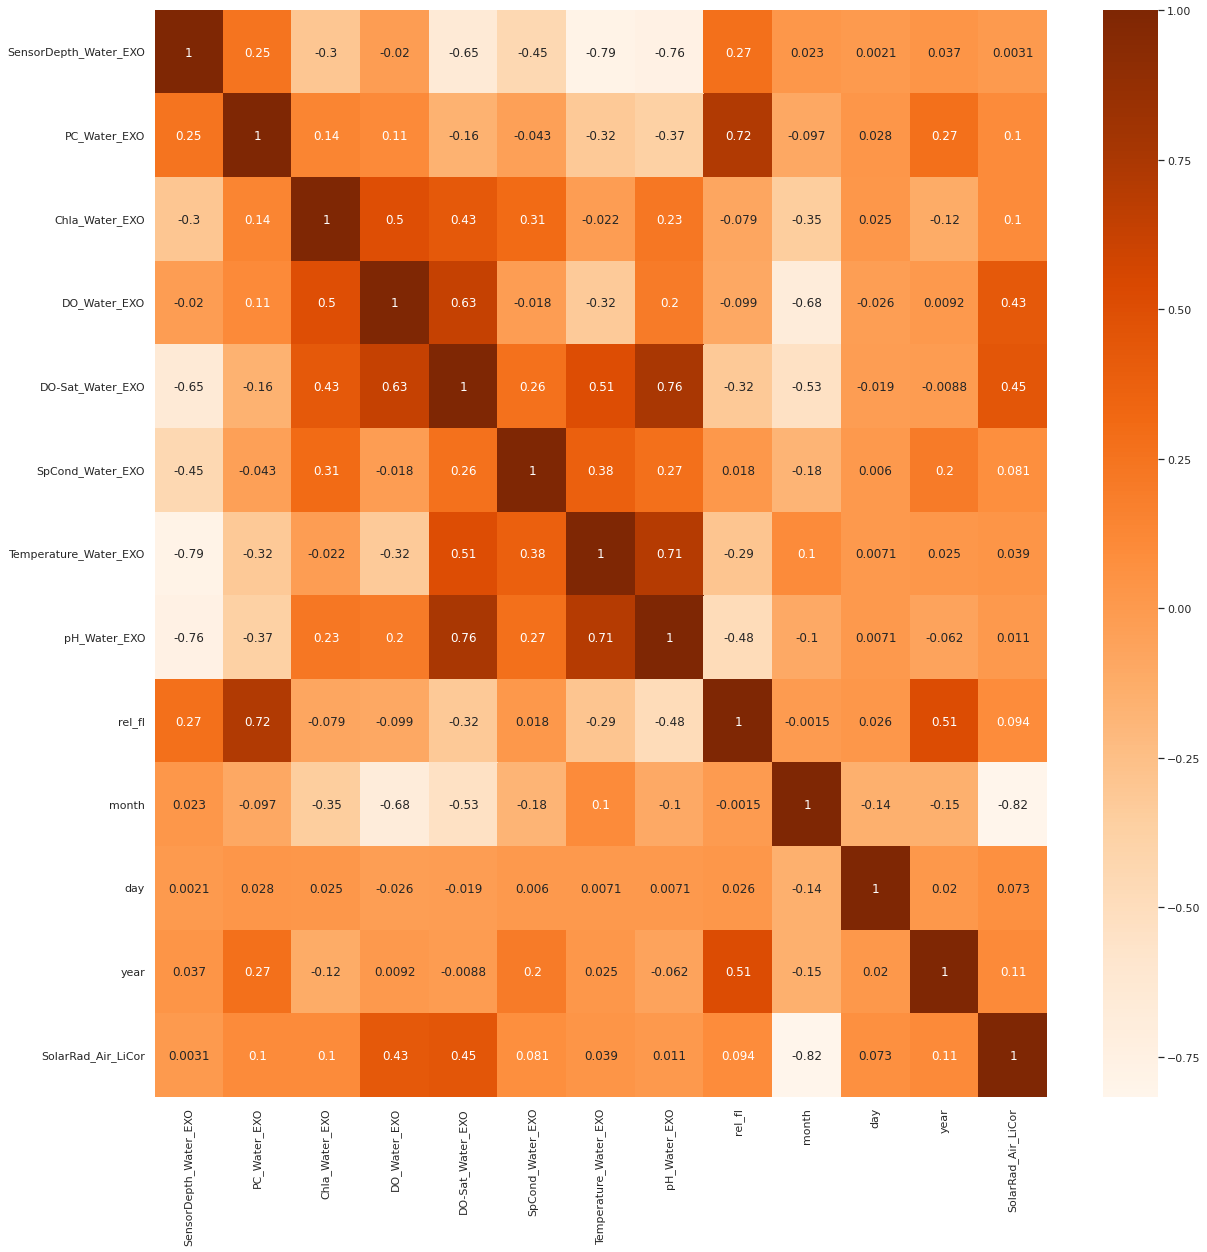

In [66]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='Oranges')
plt.show()

## Observation:

Phycocyanin has good correlations with:
1. Sensor depth
2. Chlorophyl A
3. Solar Radiation
4. Dissolved Oxygen
5. pH of water (negatively)
6. Water temperature (negatively)
7. Relative fluorescence

Let's start with

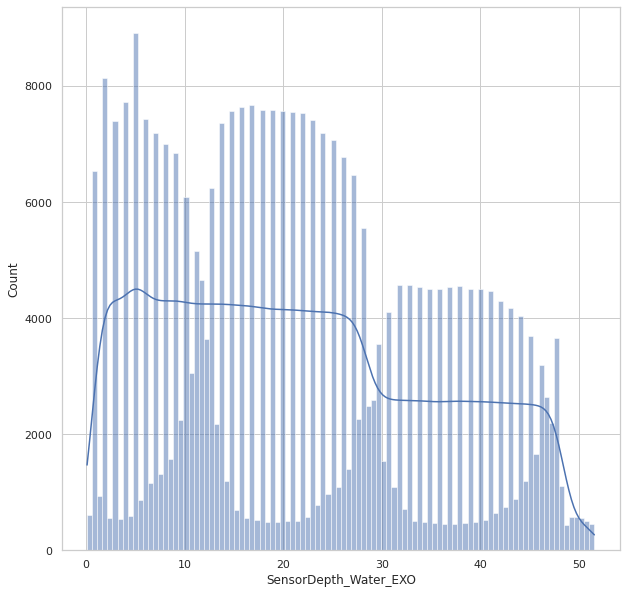

In [67]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x='SensorDepth_Water_EXO', bins=100, kde=True)
plt.show()

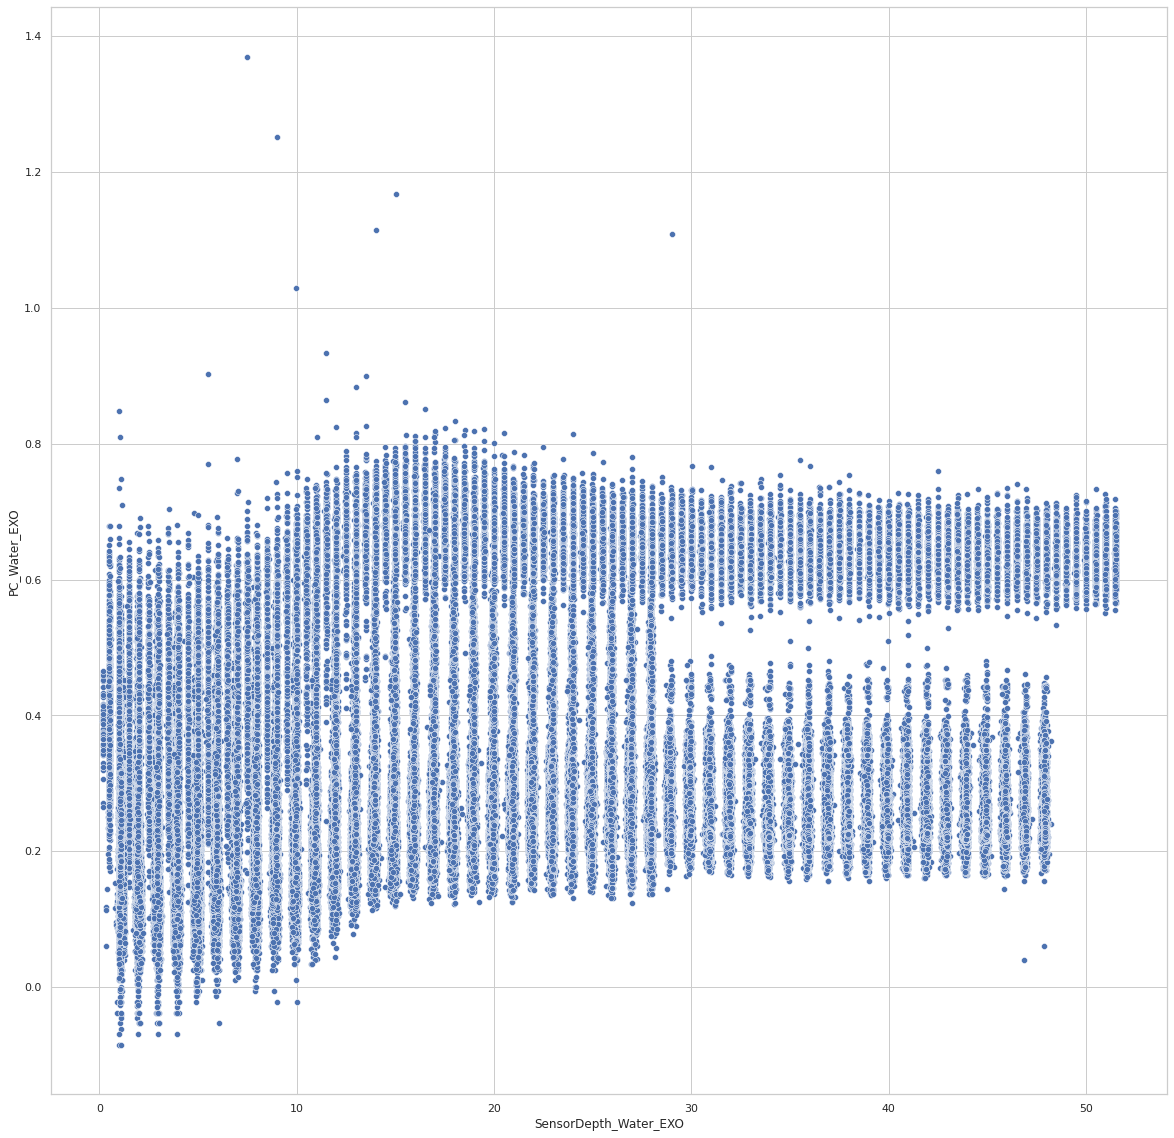

In [68]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x='SensorDepth_Water_EXO', y='PC_Water_EXO')
plt.show()

## Observation

1. Phycocyanin concentrations appear to be in clusters at different levels of sensor depth.
2. There seems to be more phycocyanin concentration towards the surface and reduces at deeper depths of the lake.

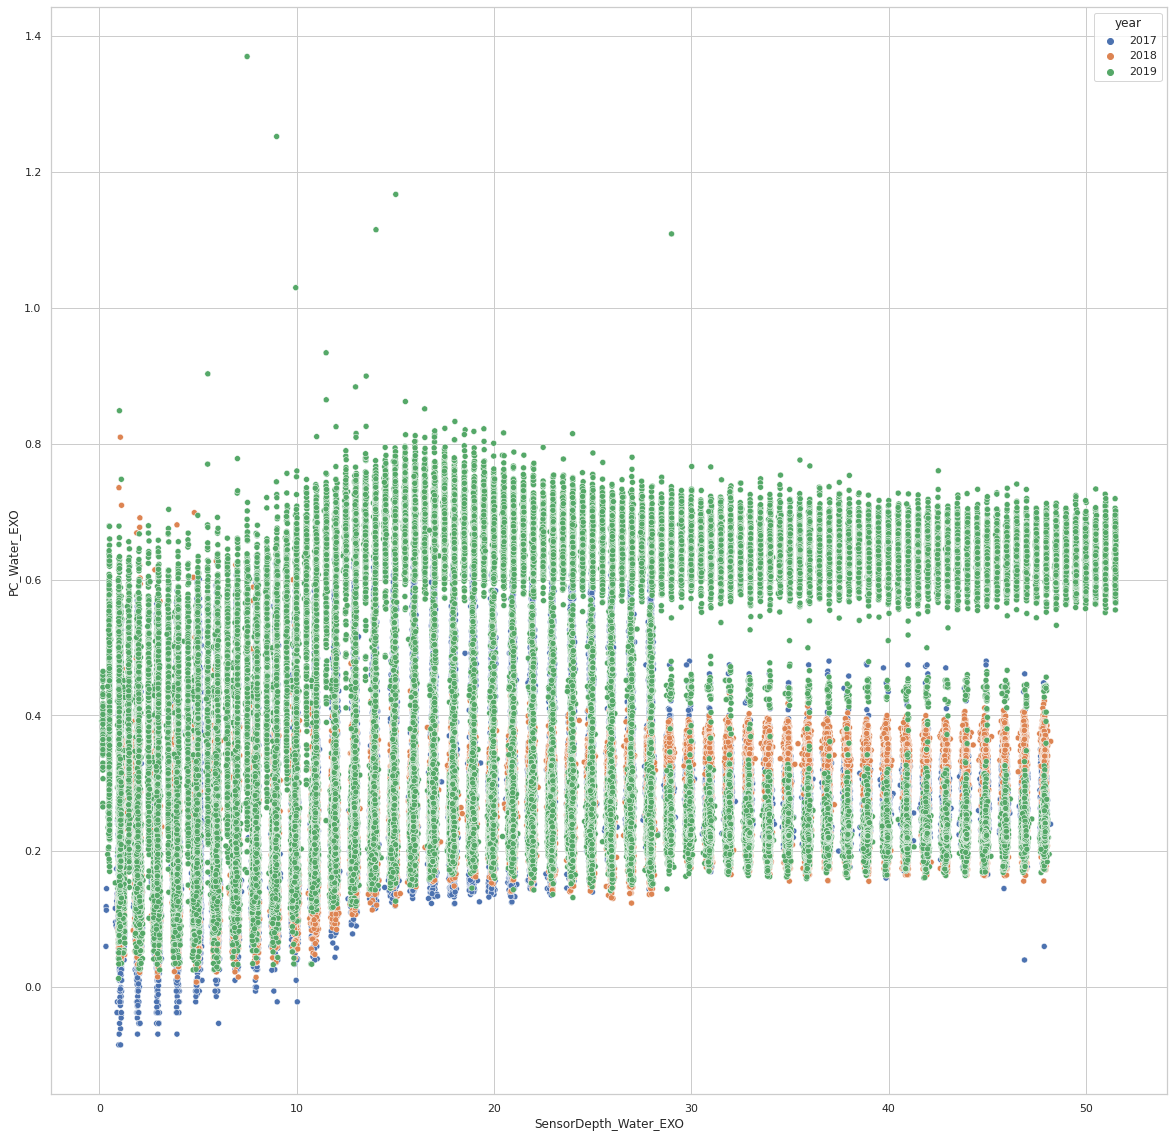

In [69]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x='SensorDepth_Water_EXO', y='PC_Water_EXO', hue = 'year', palette='deep')
plt.show()

## Observation:

Phycocyanin level is higher in the year 2019, followed by 2017, 2018. Let's confirm this observation

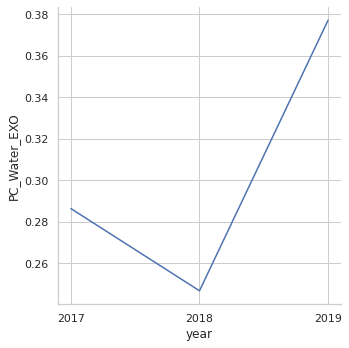

In [70]:
mean_pc_by_yr = df.groupby('year', as_index=False)['PC_Water_EXO'].mean()
mean_pc_by_yr.year = mean_pc_by_yr.year.astype('str')
sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

### Need to explore what changed from 2017 to 2018 and did the factors reverse from 2018 to 2019?

In [71]:
df_mean = df.groupby('year', as_index=False)[['PC_Water_EXO', 'Chla_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'SolarRad_Air_LiCor']].mean()

df_mean.year = df_mean.year.astype('str')
df_mean.head()

,year,PC_Water_EXO,Chla_Water_EXO,DO_Water_EXO,DO-Sat_Water_EXO,SpCond_Water_EXO,Temperature_Water_EXO,pH_Water_EXO,rel_fl,SolarRad_Air_LiCor
0,2017,0.286253,1.825968,10.128695,93.701396,140.490839,11.111660,7.471845,1.357572,190.289638
1,2018,0.246642,2.349001,10.533959,95.341475,143.578668,11.313672,7.422336,1.248319,181.204093
2,2019,0.377043,1.498548,10.185903,93.537137,142.489706,11.429975,7.424284,2.075108,204.334138


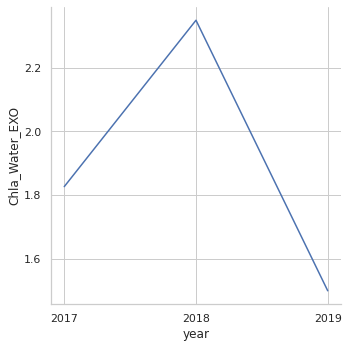

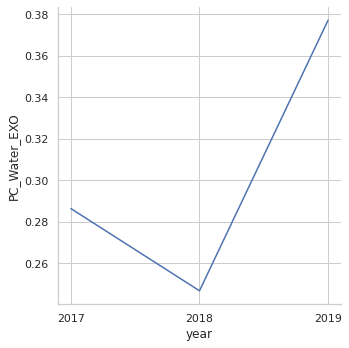

In [72]:
sns.relplot(data=df_mean, x='year', y='Chla_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

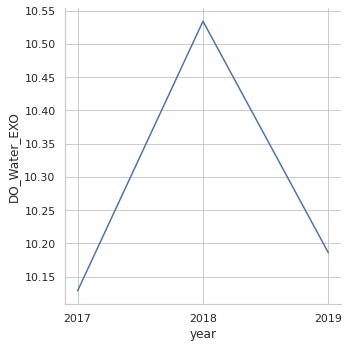

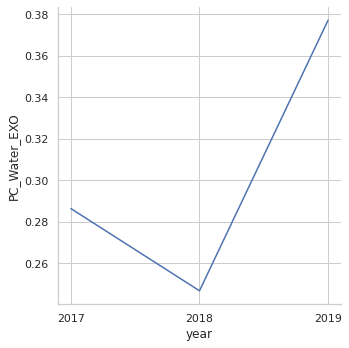

In [73]:
sns.relplot(data=df_mean, x='year', y='DO_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

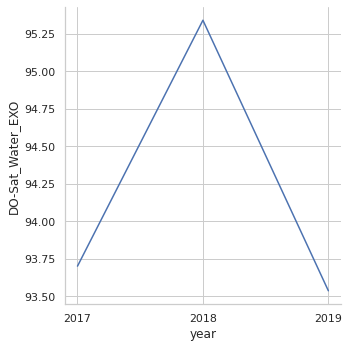

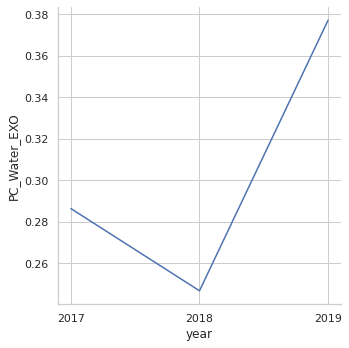

In [74]:
sns.relplot(data=df_mean, x='year', y='DO-Sat_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

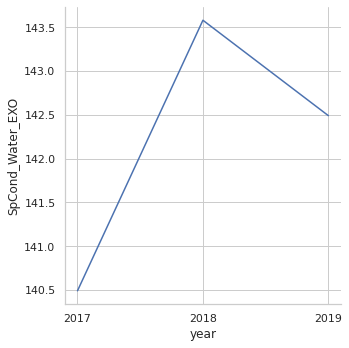

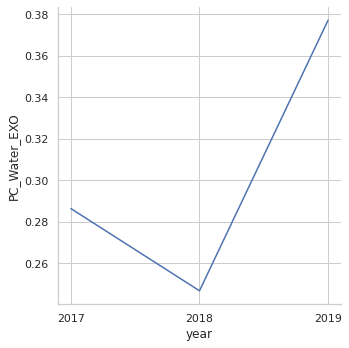

In [75]:
sns.relplot(data=df_mean, x='year', y='SpCond_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

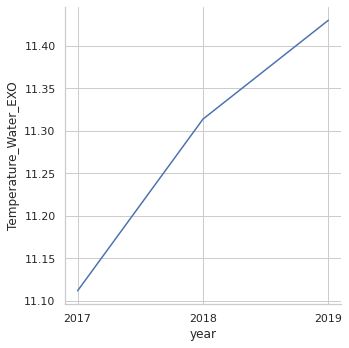

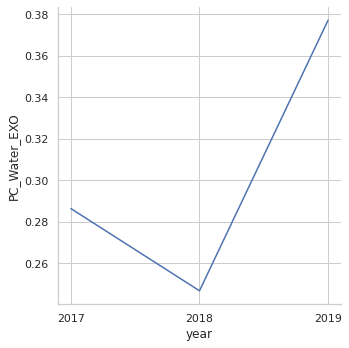

In [76]:
sns.relplot(data=df_mean, x='year', y='Temperature_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

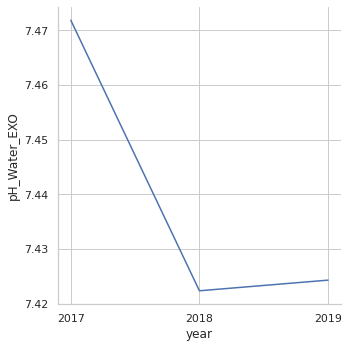

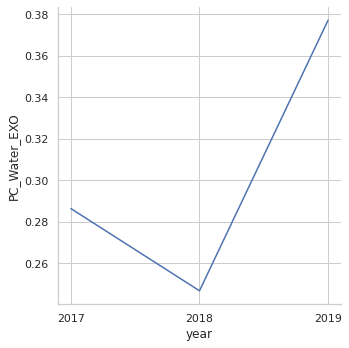

In [77]:
sns.relplot(data=df_mean, x='year', y='pH_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

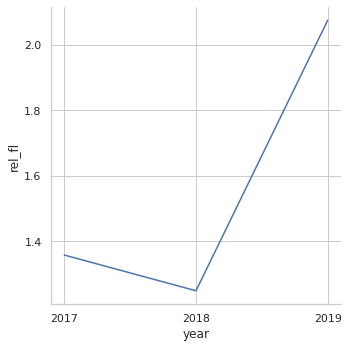

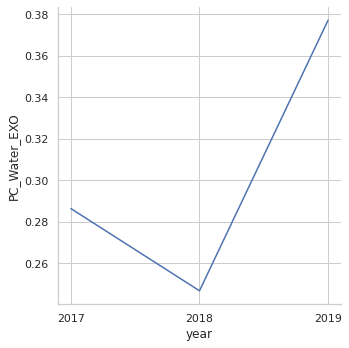

In [78]:
sns.relplot(data=df_mean, x='year', y='rel_fl', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

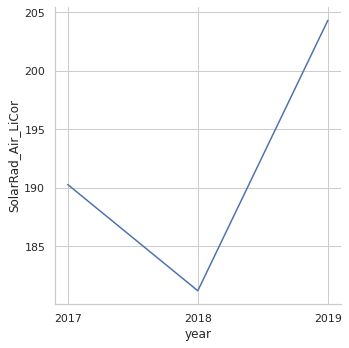

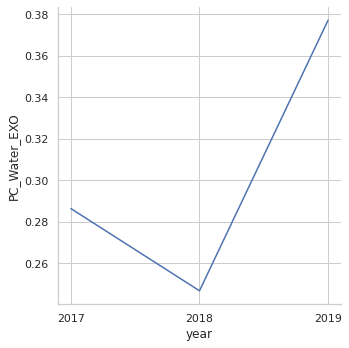

In [79]:
sns.relplot(data=df_mean, x='year', y='SolarRad_Air_LiCor', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

## Seasonal exploration

1. Spring - March to May.
2. Summer - June to August.
3. Autumn - September to November.
4. Winter - December to February.


In [83]:
def month_to_season(month:int)->int:
       if month >= 3 and month<=5:
              return 1
       if month >= 6 and month<=8:
              return 2
       if month >=9 and month<=11:
              return 3
       return 4

In [84]:
df['season'] = df.month.map(month_to_season)

In [87]:
season_str = {
       1:'spring',
       2:'summer',
       3:'autumn',
       4:'winter'
}

df_season_mean = df.groupby('season', as_index=False)[['PC_Water_EXO', 'Chla_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'SolarRad_Air_LiCor']].mean()

df_season_mean['season_str'] = df_season_mean.season.map(lambda x: season_str[x])

In [88]:
df_season_mean

,season,PC_Water_EXO,Chla_Water_EXO,DO_Water_EXO,DO-Sat_Water_EXO,SpCond_Water_EXO,Temperature_Water_EXO,pH_Water_EXO,rel_fl,SolarRad_Air_LiCor,season_str
0,1,0.313404,3.859129,12.481127,105.163891,144.665307,7.773252,7.580337,1.308594,202.275106,spring
1,2,0.334853,1.768215,10.575689,97.777042,142.149775,11.652991,7.435367,1.728625,237.296083,summer
2,3,0.283226,1.398627,9.181904,85.379332,141.518771,11.666963,7.405912,1.568591,124.544336,autumn
3,4,0.286418,2.002778,10.159874,85.938048,139.687474,8.019510,7.605566,1.384964,47.665465,winter


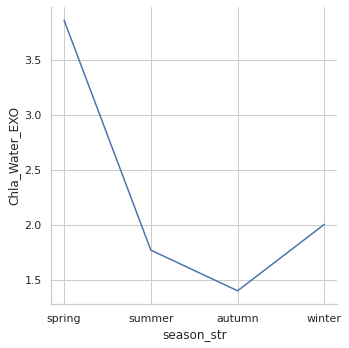

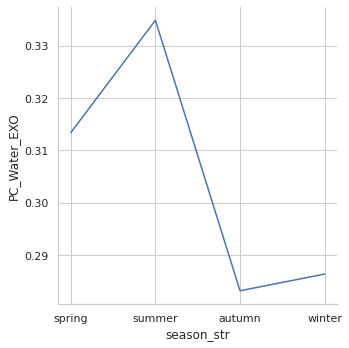

In [89]:
sns.relplot(data=df_season_mean, x='season_str', y='Chla_Water_EXO', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()